In [17]:
# Modules
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Setup environment and update dictionary
!source setup_project.sh

Rebel manifesto dictionary updated.


In [18]:
# Load rebel manifesto data
manifesto_dictionary = pd.read_pickle('../data/manifesto_dictionary.pkl')
manifesto_dictionary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 11 to 131
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        132 non-null    object        
 1   group          132 non-null    object        
 2   date           71 non-null     datetime64[ns]
 3   year           71 non-null     period[A-DEC] 
 4   source_type    132 non-null    object        
 5   document_type  124 non-null    object        
 6   description    106 non-null    object        
 7   author         85 non-null     object        
 8   language       132 non-null    object        
 9   file_path      132 non-null    object        
 10  file_name      132 non-null    object        
 11  file_type      132 non-null    object        
dtypes: datetime64[ns](1), object(10), period[A-DEC](1)
memory usage: 13.4+ KB


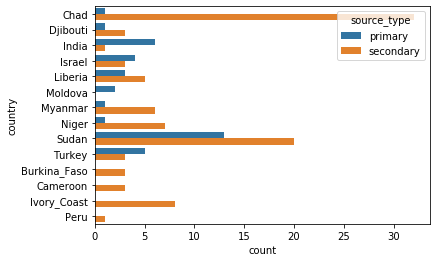

In [26]:
# Exploratory plots
blue = sns.color_palette('tab10')[0]
orange = sns.color_palette('tab10')[1]

# Sources by country
sns.countplot(y='country', hue='source_type', data=manifesto_dictionary)

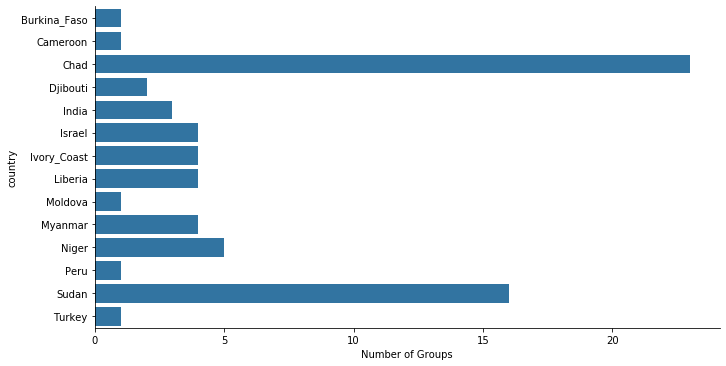

In [27]:
# Number of groups by country
cgs_counts = manifesto_dictionary.groupby(['country'])['group'].nunique()
cgs_counts = cgs_counts.to_frame(name='Number of Groups').reset_index()
sns.catplot(x='Number of Groups', y='country', data=cgs_counts,
            kind='bar', color=blue, aspect=2)

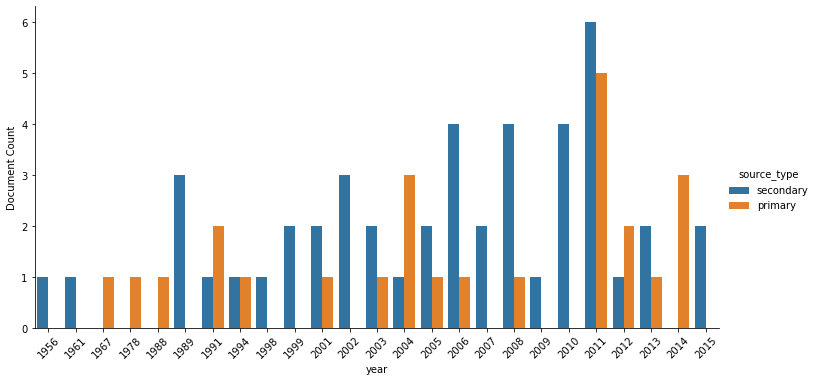

In [32]:
sy_counts = manifesto_dictionary.groupby(['year'])['source_type'].value_counts()
sy_counts = sy_counts.to_frame(name='Document Count').reset_index()
g = sns.catplot(x='year', y='Document Count', hue='source_type', 
                kind='bar', data=sy_counts, aspect=2)
g.set_xticklabels(rotation=45)